In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from scipy.signal import firwin
from scipy.signal import freqz
from scipy.signal import find_peaks_cwt
from scipy.signal import butter, lfilter
import peakutils
from peakutils.plot import plot as pplot
from matplotlib import pyplot

%matplotlib inline

ordata = np.genfromtxt("team9_assignment7_sitting.csv", dtype=float, delimiter=',', names=True)
timestamp = ordata['time']
scaler = preprocessing.MinMaxScaler()
# normazile data
IR = scaler.fit_transform(ordata['IR'])
RED = scaler.fit_transform(ordata['RED'])


# butter filter
def butter_bandpass(lowcut, highcut, fs, order):
    nyq = 0.5 * fs
    low = lowcut/nyq
    high = highcut/nyq
    b, a = butter(order, [low, high], btype='band', analog = False)
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def caculateRate(timestamp, data, thres, min_dist, fs):
    peakind = peakutils.indexes(data, thres, min_dist)
    numberOfPeak = len(peakind)
    print "number of peak %d" % numberOfPeak
    rate = np.zeros(numberOfPeak - 1)
    for i in range(1, numberOfPeak):
        interval =  timestamp[peakind[i]]  - timestamp[peakind[i-1]] 
        rate[i-1] =  60 / interval
    return rate

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and wil

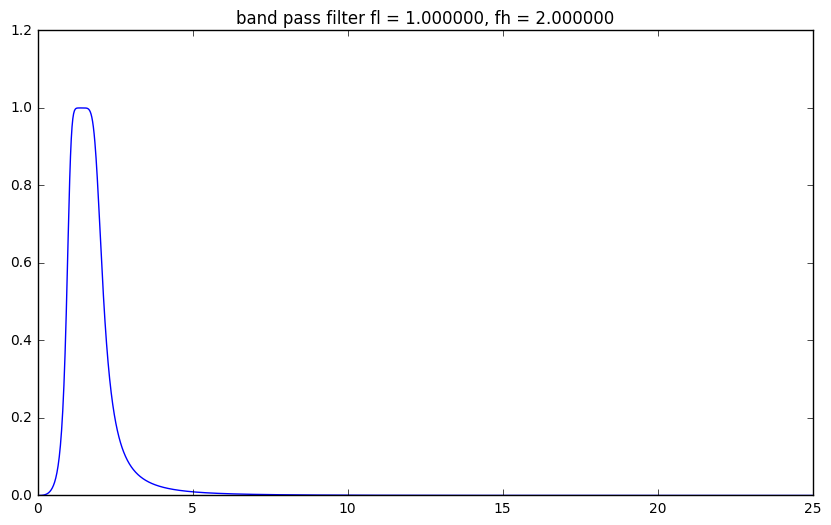

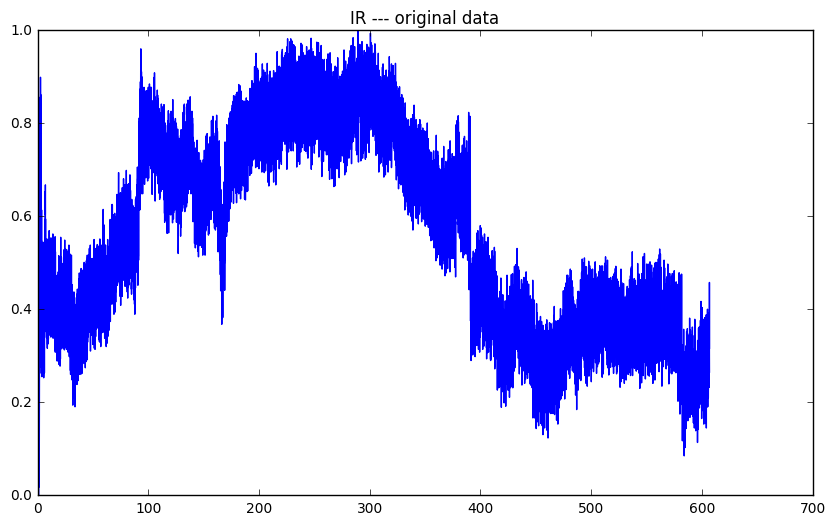

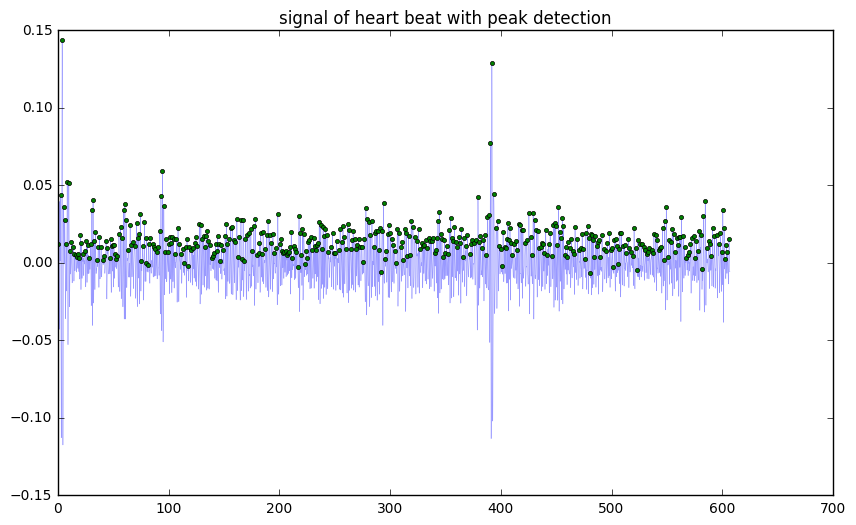

In [2]:
fs = 50.0
lowcut = 1
highcut = 2
order = 3
data = IR
time = timestamp
thres=0.2
min_dist= 20
# lowcut = 1/6.0
# highcut = 1/3.0

# Plot the frequency response for a few different orders.
plt.figure(figsize=(10,6))
plt.clf()
b, a = butter_bandpass(lowcut, highcut, fs, order)
w, h = freqz(b, a, worN=2000)

plt.plot((fs * 0.5 / np.pi) * w, abs(h))
plt.title("band pass filter fl = %f, fh = %f" %(lowcut, highcut))
plt.figure()

y = butter_bandpass_filter(data, lowcut, highcut, fs, order)
plt.figure(figsize=(10,6))
plt.plot(time, data)
plt.title("IR --- original data")
pyplot.figure(figsize=(10,6))
heartIndex = peakutils.indexes(y, thres, min_dist)
plt.plot(time, y, lw=0.4, alpha=0.4 )
plt.plot(time[heartIndex],y[heartIndex], marker="o", ls="", ms=3 )
plt.title("signal of heart beat with peak detection")

[ 30.6122449  30.6122449  30.6122449 ...,  65.2173913  65.2173913
  65.2173913]


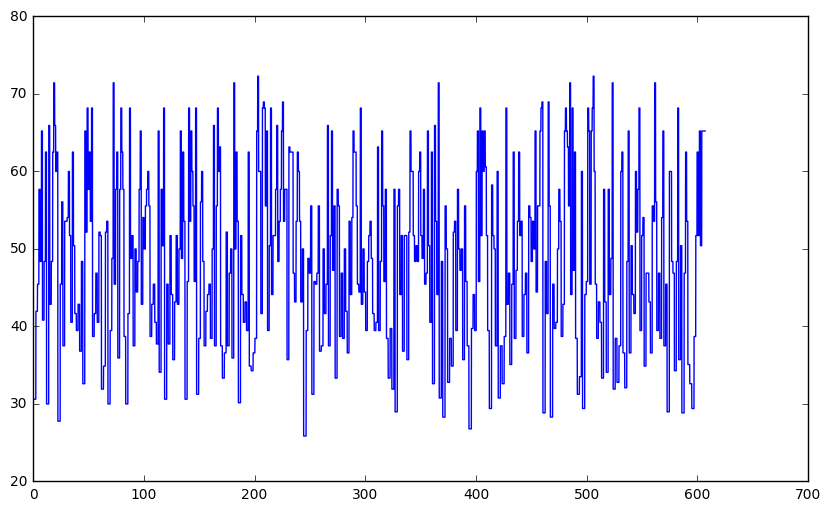

In [23]:
heartBeatArray = np.zeros(len(IR))
count = 1
for i in range(len(heartBeatArray)):
    if i < heartIndex[count] or  count == len(heartRate) - 1 :
        heartBeatArray[i] = heartRate[count - 1]
    else:
        if(count < len(heartRate) - 1):
            count = count + 1
            heartBeatArray[i] = heartRate[count - 1]
print heartBeatArray
plt.figure(figsize=(10,6))
plt.plot(time, heartBeatArray)

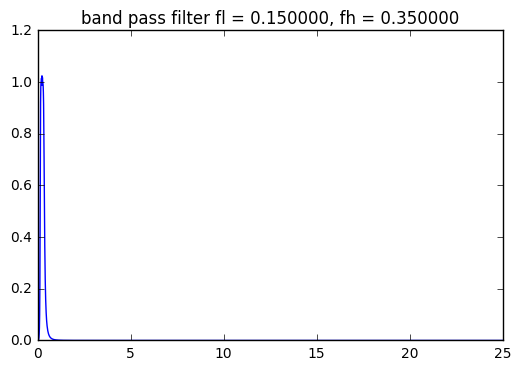

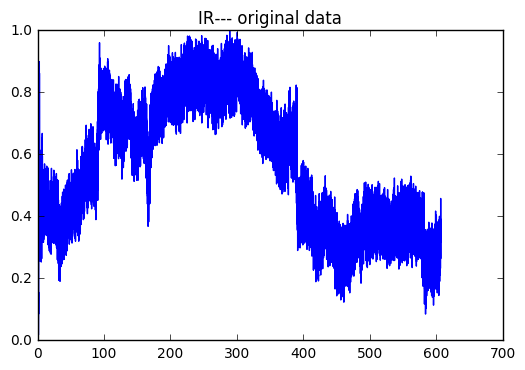

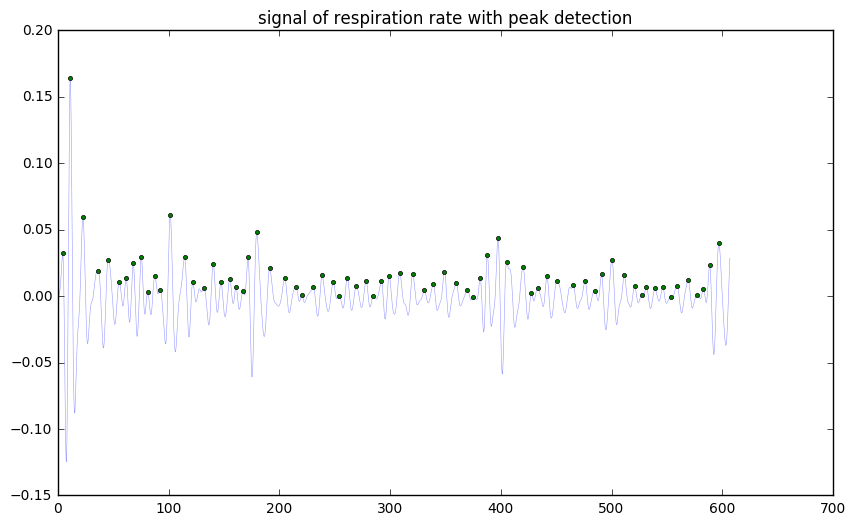

In [5]:
fs = 50.0
lowcut = 0.15
highcut = 0.35
order = 4
data = IR
time = timestamp
thres= 0.01
min_dist = 100
# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
b, a = butter_bandpass(lowcut, highcut, fs, order)
w, h = freqz(b, a, worN=2000)

plt.plot((fs * 0.5 / np.pi) * w, abs(h))
plt.title("band pass filter fl = %f, fh = %f" %(lowcut, highcut))
plt.figure()

y = butter_bandpass_filter(data, lowcut, highcut, fs, order)
plt.plot(time, data)
plt.title("IR--- original data")
pyplot.figure(figsize=(10,6))
respirationIndex = peakutils.indexes(y, thres, min_dist)
plt.plot(time, y, lw=0.4, alpha=0.4 )
plt.plot(time[respirationIndex],y[respirationIndex], marker="o", ls="", ms=3 )
plt.title("signal of respiration rate with peak detection")

In [6]:
respirationRate = caculateRate(time, y, thres,min_dist,fs)
# filter abnormal result
result = [x for x in respirationRate if x <= 20 ]
print "the average respiration  rate is %f"% (np.sum(result)/len(result))
print "the real time respiration rate is: \n"
print result

number of peak 72
the average respiration  rate is 7.771530
the real time respiration rate is: 

[8.7847730600292824, 5.2356020942408383, 4.497751124437781, 6.1855670103092768, 6.1349693251533735, 9.6930533117932178, 9.3312597200622083, 8.2530949105914768, 10.291595197255578, 9.3896713615023462, 12.631578947368421, 6.5359477124182961, 4.6367851622874818, 8.0321285140562253, 6.0606060606060659, 7.0588235294117645, 8.4865629420084598, 7.6238881829733396, 10.582010582010552, 9.5087163232963512, 13.422818791946312, 7.5093867334167621, 5.1457975986277891, 4.434589800443459, 6.1349693251533735, 10.507880910683049, 5.9113300492610801, 7.2992700729927016, 6.036217303822939, 10.869565217391283, 8.3102493074792587, 7.2551390568318883, 6.8965517241379404, 8.9955022488755407, 8.3916083916084183, 8.5348506401137616, 6.2630480167014717, 5.1457975986278015, 5.6497175141242915, 7.4719800747197729, 5.940594059405961, 5.7142857142857144, 5.8479532163742416, 11.049723756906179, 9.9502487562188566, 9.2165

[  107   278   565   899  1142  1387  1542  1703  1885  2031  2191  2310
  2540  2864  3051  3299  3512  3689  3886  4028  4186  4298  4498  4790
  5129  5374  5517  5771  5977  6226  6364  6545  6752  6970  7137  7316
  7492  7732  8024  8290  8491  8744  9007  9264  9400  9551  9714  9954
 10149 10518 10708 10848 11062 11288 11657 11921 12138 12297 12530 12811
 13044 13201 13312 13503 13680 13857 14004 14252 14464 14600 14742 14950]


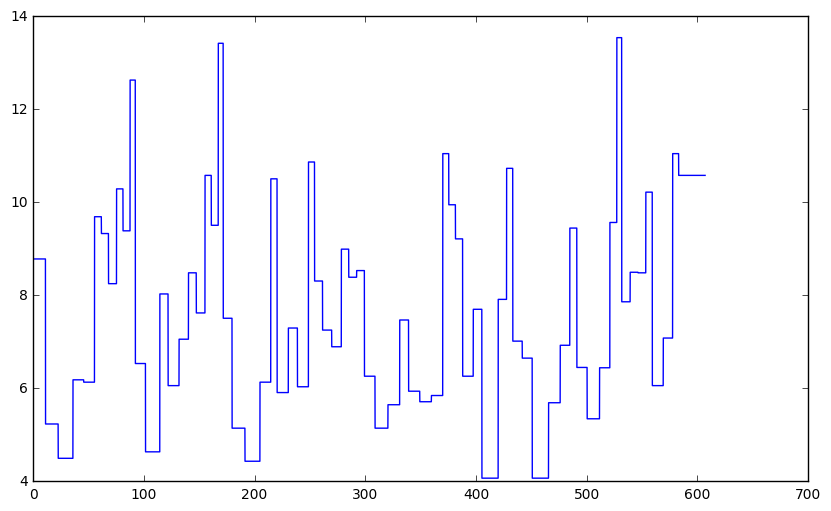

In [7]:
for i in range(len(respirationRate)):
    if respirationRate[i] > 20:
        respirationRate[i] = respirationRate[i - 1]

print respirationIndex
respirationArray = np.zeros(len(IR))
count = 1
for i in range(len(respirationArray)):
    if i < respirationIndex[count] or  count == len(respirationRate) - 1 :
        respirationArray[i] = respirationRate[count - 1]
    else:
        if(count < len(respirationRate) - 1):
            count = count + 1
            respirationArray[i] = respirationRate[count - 1]
plt.figure(figsize=(10,6))
plt.plot(time, respirationArray)

# Calculate SPO2 

## IR signal

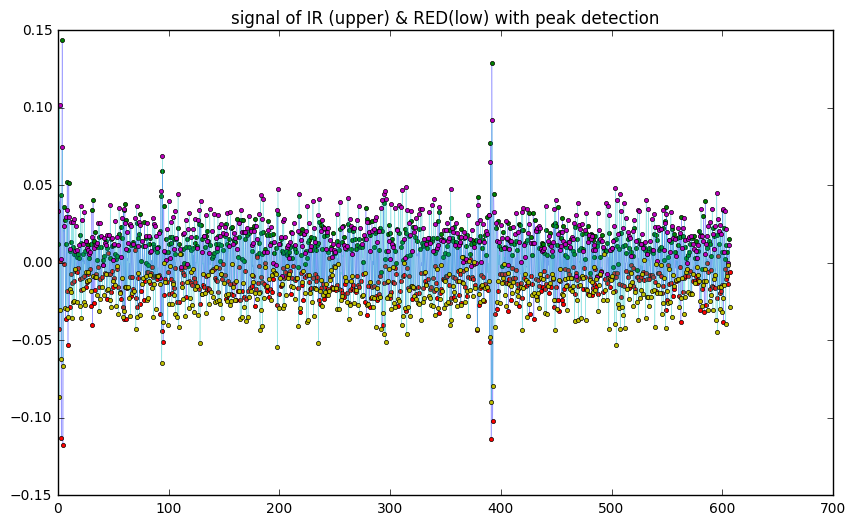

In [8]:
#IROrgin = ordata['IR']
#REDOrgin = ordata['RED']
IROrgin = IR
REDOrgin = RED

fs = 50.0
lowcut = 1
highcut = 2
order = 3

IROrgin = butter_bandpass_filter(IROrgin, lowcut, highcut, fs, order)
REDOrgin = butter_bandpass_filter(REDOrgin, lowcut, highcut, fs, order)
time = timestamp
thres=0.05
min_dist=20
pyplot.figure(figsize=(10,6))
# the index of "postive" peak for IR signal
indexPositiveIR = peakutils.indexes(IROrgin, thres, min_dist)
# the index of "negative" peak for IR signal
indexNegativeIR = peakutils.indexes(-1*IROrgin, thres, min_dist)
# the index of "postive" peak for RED signal
indexPositiveRED = peakutils.indexes(REDOrgin, thres, min_dist)
# the index of "negative" peak for RED signal
indexNegativeRED = peakutils.indexes(-1*REDOrgin, thres, min_dist)
# we find the 15th negative peak will be wrong tagged for "RED" signal
# so we manually remove this point from our indexNegativeRED tuple using following code
indexNegativeRED = list(indexNegativeRED)
del indexNegativeRED[14]
plt.plot(time, IROrgin, lw=0.4, alpha=0.4 )
plt.plot(time[indexPositiveIR],IROrgin[indexPositiveIR], marker="o", ls="", ms=3 )
plt.plot(time[indexNegativeIR],IROrgin[indexNegativeIR], marker="o", ls="", ms=3 )
plt.plot(time, REDOrgin, lw=0.4, alpha=0.4 )
plt.plot(time[indexPositiveRED],REDOrgin[indexPositiveRED], marker="o", ls="", ms=3 )
plt.plot(time[indexNegativeRED],REDOrgin[indexNegativeRED], marker="o", ls="", ms=3 )
plt.title("signal of IR (upper) & RED(low) with peak detection")

In [11]:
def calculateDC(data):
    DC = np.zeros(len(data) - 1) 
    for i in range(len(DC)):
        DC[i] = (data[i + 1] + data[i])/2.0
    return DC

def calculateAC(positive, negative):
#     if len (positive) != len(negative):
#          raise ValueError("the input data should has same dimension")
    minLen = min(len(positive), len(negative))
    AC = np.zeros(minLen - 1)
    for i in range(len(AC)):
        AC[i] = positive[i + 1] - negative[i]
    return AC


ACIR = abs(calculateAC(IROrgin[indexPositiveIR], IROrgin[indexNegativeIR]))
ACRED = abs(calculateAC(REDOrgin[indexPositiveRED], REDOrgin[indexNegativeRED]))

minLen = min(len(ACIR), len(ACRED))
ACIR = ACIR[0:minLen]
ACRED = ACRED[0:minLen]
# DCIR = IROrgin[indexNegativeIR]
# DCRED = REDOrgin[indexNegativeRED]
DCIR = abs(calculateDC(indexNegativeIR))
DCRED = abs(calculateDC(indexNegativeRED))

DCIR = DCIR[0:minLen]
DCRED = DCRED[0:minLen]


ratioAverage = (ACRED * DCIR) * 1.0/(ACIR * DCRED)
spo2 = -45.060*ratioAverage* ratioAverage + 30.354 *ratioAverage + 94.845 

for i in range(len(spo2)):
    if spo2[i] < 90:
        spo2[i] = spo2[i-1] 

count = len(spo2) - 1
while(count >= 0):
    if spo2[count] < 90:
        spo2[count] = spo2[count+1]
    count = count - 1

97.0458339014


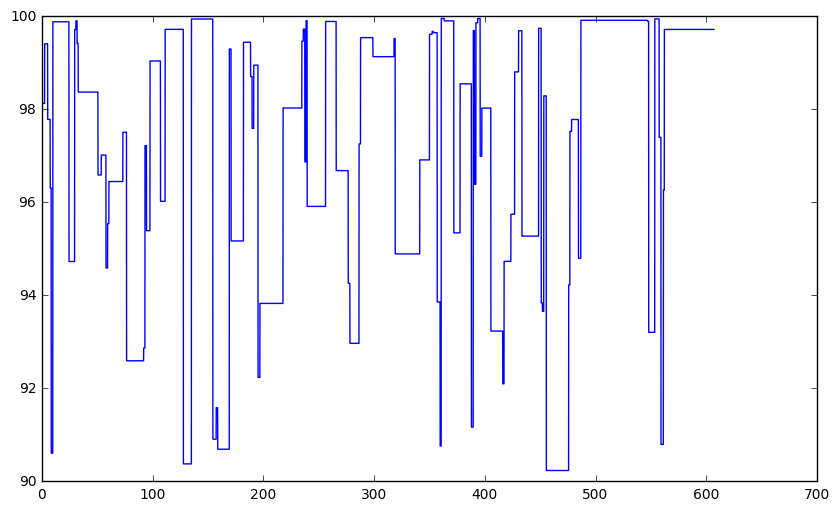

In [21]:
spo2Array = np.zeros(len(IR))
count = 1
for i in range(len(spo2Array)):
    if i < indexPositiveIR[count] or  count == len(spo2) - 1 :
        spo2Array[i] = spo2[count - 1]
    else:
        if(count < len(spo2) - 1):
            count = count + 1
            spo2Array[i] = spo2[count - 1]
plt.figure(figsize=(10,6))
plt.plot(time, spo2Array)
print sum(spo2Array)/len(spo2Array)

In [15]:
saveData = np.zeros((len(IR), 9))
ir = ordata['IR']
red = ordata['RED']
x = ordata["X"]
y = ordata["Y"]
z = ordata["Z"]

for i in range(len(IR)):
    saveData[i, 0] = timestamp[i]
    saveData[i, 1] = ir[i]
    saveData[i, 2] = red[i]
    saveData[i, 3] = x[i]
    saveData[i, 4] = y[i]    
    saveData[i, 5] = z[i]
    saveData[i, 6] = heartBeatArray[i]
    saveData[i, 7] = respirationArray[i]
    saveData[i, 8] = spo2Array[i]

In [16]:
np.savetxt("team9_assignment7_sitting.csv", saveData, fmt='%.3f', header="Time,IR, RED, X, Y, Z, Heart Rate, Resoiration Rate, SPO2", delimiter=',')

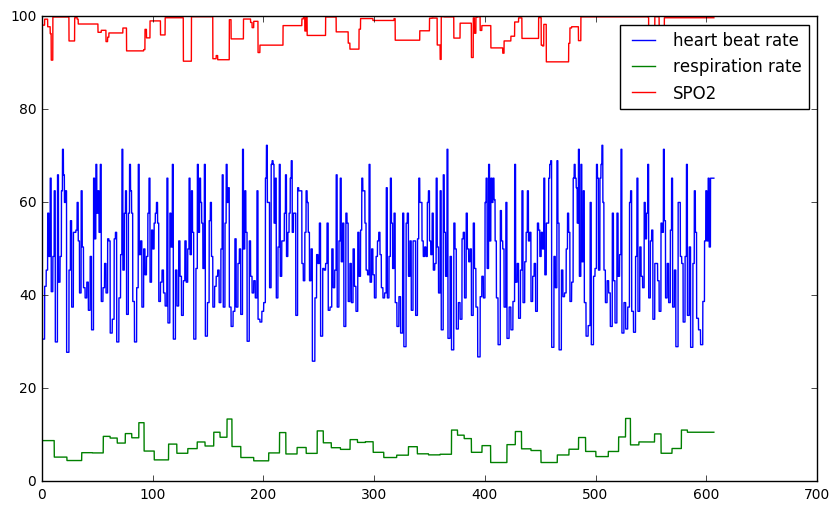

In [18]:
plt.figure(figsize=(10,6))
plt.plot(time, heartBeatArray, label='heart beat rate')
plt.plot(time, respirationArray, label = "respiration rate")
plt.plot(time, spo2Array, label = "SPO2")
plt.legend()

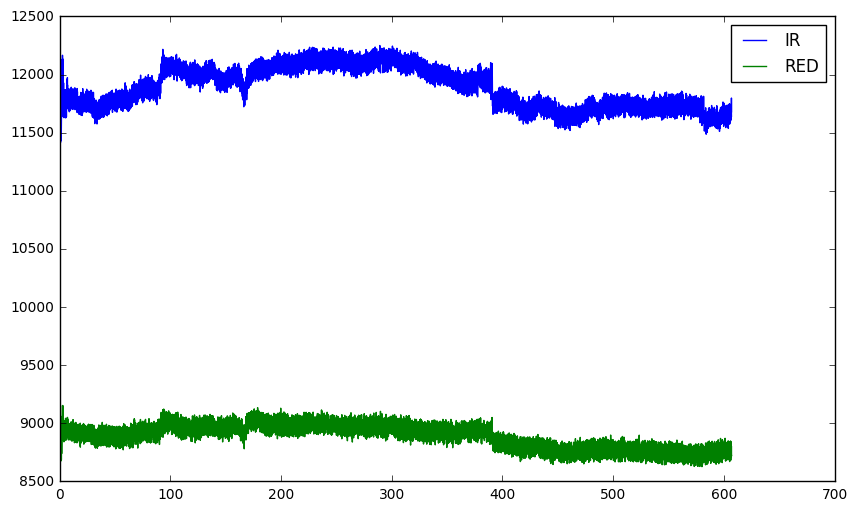

In [19]:
plt.figure(figsize=(10,6))
plt.plot(time, ir, label = "IR")
plt.plot(time, red, label = "RED")
plt.legend()

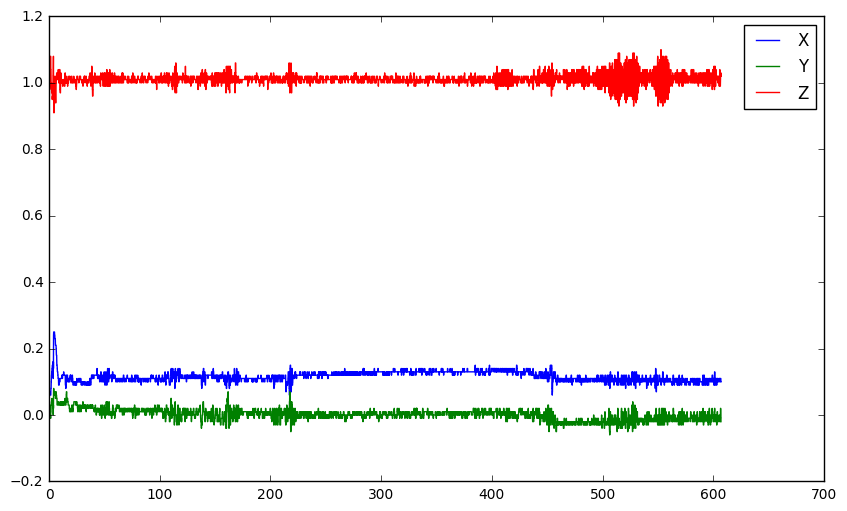

In [20]:
plt.figure(figsize=(10,6))
plt.plot(time, x, label = "X")
plt.plot(time, y, label = "Y")
plt.plot(time, z, label = "Z")

plt.legend()

In [24]:
np.sum(spo2Array)/len(spo2Array)

97.045833901386814